![](https://tophotel.news/wp-content/uploads/2019/03/New-York-City-Brooklyn-Bridge-Panorama-Juergen-Roth-2.jpg)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# from mpl_toolkits.basemap import Basemap
import os


import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

../input/train.csv
../input/test.csv
../input/googleplaystore.csv
../input/googleplaystore_user_reviews.csv
../input/data.csv
../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv


In [2]:
df=pd.read_csv("../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")

In [3]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.shape

(48895, 16)

In [6]:
df.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

In [7]:
df.drop(['id','host_id','host_name','last_review'],axis=1,inplace=True)

In [8]:
df.isnull().sum()

name                                 16
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
def impute_median(series):
    return series.fillna(series.median())

In [10]:
df.reviews_per_month=df["reviews_per_month"].transform(impute_median)

In [11]:
df.isnull().sum()

name                              16
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

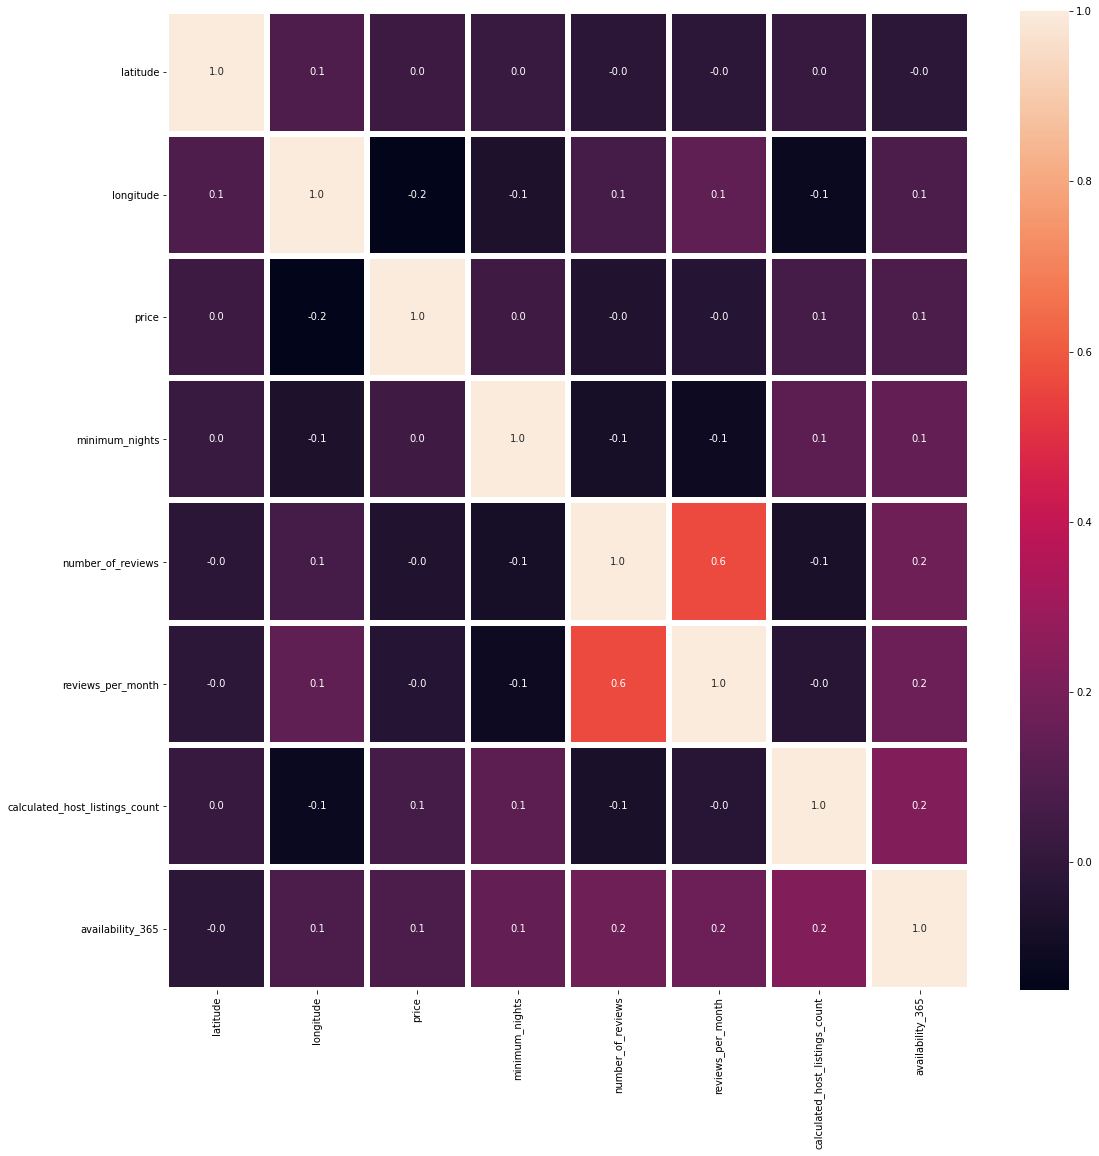

In [12]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax)
plt.show()

In [13]:
sns.pairplot(df)
plt.show()

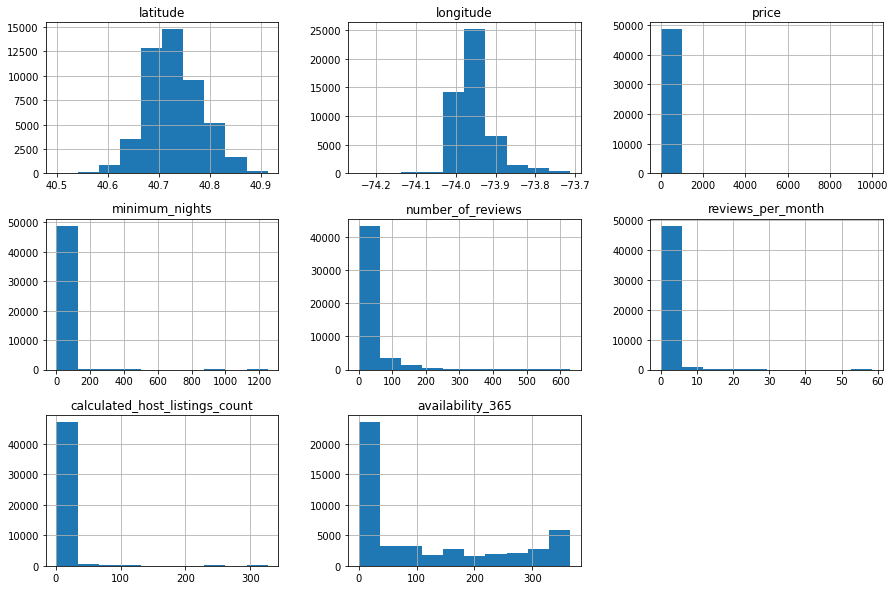

In [14]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

In [15]:
df.columns

Index(['name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [16]:
df.nunique()

name                              47905
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

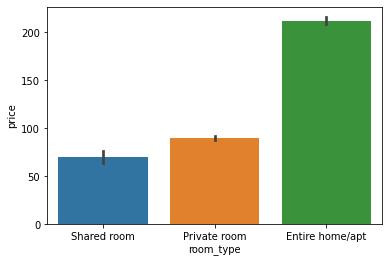

In [17]:
#room_type - price
result = df.groupby(["room_type"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='room_type', y="price", data=df, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

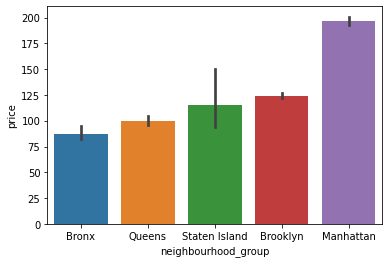

In [18]:
#neighbourhood_group - price
result = df.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

In [19]:
labels = df.neighbourhood_group.value_counts().index
colors = ['green','yellow','orange','pink','red']
explode = [0,0,0,0,0]
sizes = df.neighbourhood_group.value_counts().values

plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Airbnb According to Neighbourhood Group',color = 'blue',fontsize = 15)
plt.show()

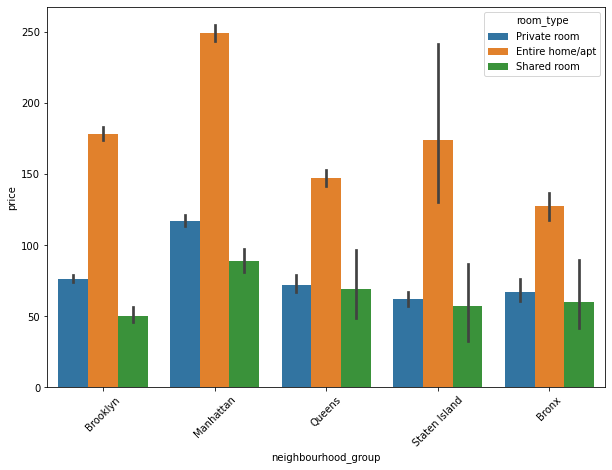

In [20]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = df)
plt.xticks(rotation=45)
plt.show()

In [21]:
plt.figure(figsize=(18,18))
sns.lmplot(x='minimum_nights',y='calculated_host_listings_count',hue="neighbourhood_group",data=df)
plt.xlabel('calculated_host_listings_count')
plt.ylabel('minimum_nights')
plt.title('calculated_host_listings_count vs minimum_nights')
plt.show()

<Figure size 1296x1296 with 0 Axes>

In [22]:
df.price.max()

10000

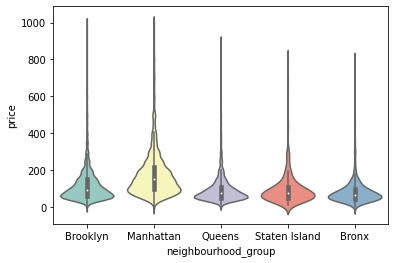

In [23]:
ax = sns.violinplot(x="neighbourhood_group", y="price",
                    data=df[df.price < 1000],
                    scale="width", palette="Set3")

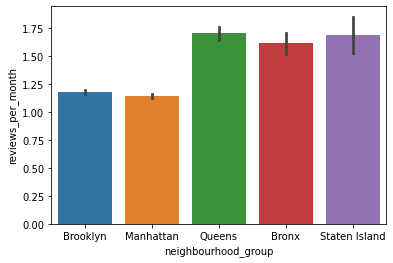

In [24]:
#neighbourhood_group - reviews_per_month
result = df.groupby(["neighbourhood_group"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x='neighbourhood_group', y="reviews_per_month", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

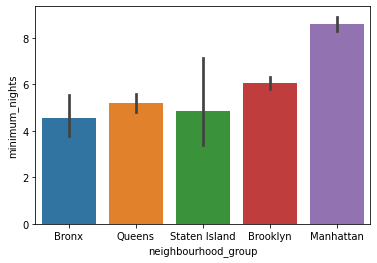

In [25]:
#neighbourhood_group - minimum_nights
result = df.groupby(["neighbourhood_group"])['minimum_nights'].aggregate(np.median).reset_index().sort_values('minimum_nights')
sns.barplot(x='neighbourhood_group', y="minimum_nights", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

In [26]:
#neighbourhood_group - number_of_reviews
result = df.groupby(["neighbourhood_group"])['number_of_reviews'].aggregate(np.median).reset_index().sort_values('number_of_reviews')
sns.barplot(x='neighbourhood_group', y="number_of_reviews", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

In [27]:
ax = sns.violinplot(x="room_type", y="price",
                    data=df[df.price < 1000],
                    scale="width", palette="Set3")

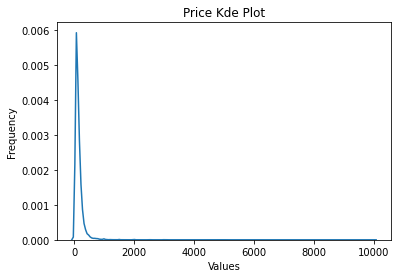

In [28]:
sns.kdeplot(df['price'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Price Kde Plot')
plt.show()

In [29]:
#neighbourhood_group - reviews_per_month
result = df.groupby(["neighbourhood_group"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x='neighbourhood_group', y="reviews_per_month", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

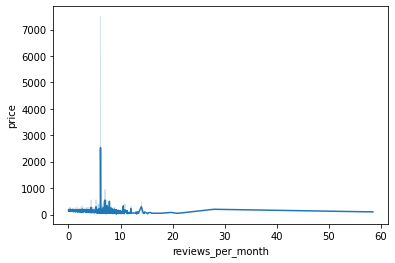

In [30]:
sns.lineplot(x='reviews_per_month',y='price',data=df)
plt.show()

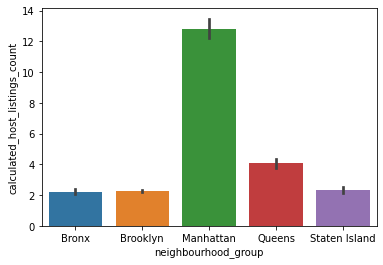

In [31]:
#neighbourhood_group - calculated_host_listings_count
result = df.groupby(["neighbourhood_group"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')
sns.barplot(x='neighbourhood_group', y="calculated_host_listings_count", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

In [32]:
sns.lineplot(x='calculated_host_listings_count',y='price',data=df)
plt.show()

In [33]:
#neighbourhood_group - availability_365
result = df.groupby(["neighbourhood_group"])['availability_365'].aggregate(np.median).reset_index().sort_values('availability_365')
sns.barplot(x='neighbourhood_group', y="availability_365", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

In [34]:
sns.lineplot(x='availability_365',y='price',data=df)
plt.show()

In [35]:
df.price.describe().T

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

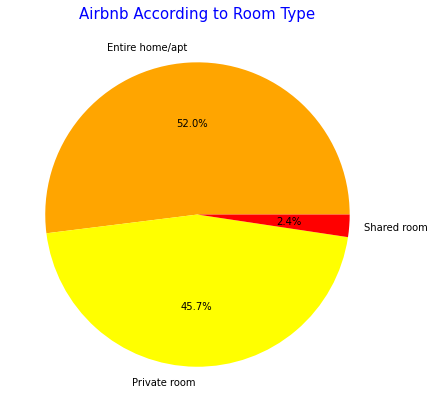

In [36]:
labels = df.room_type.value_counts().index
colors = ['orange','yellow','red']
explode = [0,0,0]
sizes = df.room_type.value_counts().values

plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Airbnb According to Room Type',color = 'blue',fontsize = 15)
plt.show()

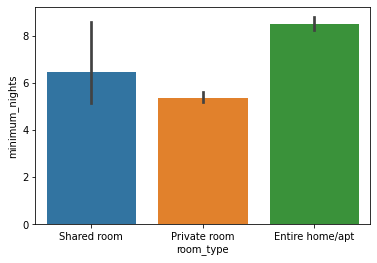

In [37]:
#room_type - minimum_nights
result = df.groupby(["room_type"])['minimum_nights'].aggregate(np.median).reset_index().sort_values('minimum_nights')
sns.barplot(x='room_type', y="minimum_nights", data=df, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

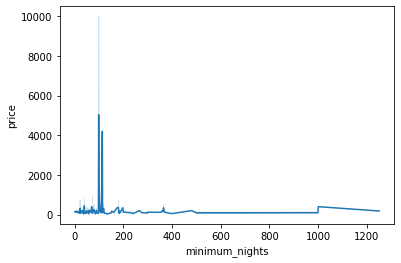

In [38]:
sns.lineplot(x='minimum_nights',y='price',data=df)
plt.show()

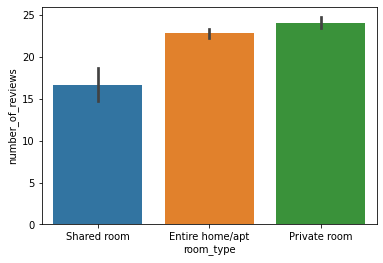

In [39]:
#room_type - number_of_reviews
result = df.groupby(["room_type"])['number_of_reviews'].aggregate(np.median).reset_index().sort_values('number_of_reviews')
sns.barplot(x='room_type', y="number_of_reviews", data=df, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

In [40]:
sns.lineplot(x='number_of_reviews',y='price',data=df)
plt.show()

In [41]:
#room_type - reviews_per_month
result = df.groupby(["room_type"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x='room_type', y="reviews_per_month", data=df, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

In [42]:
#room_type - calculated_host_listings_count
result = df.groupby(["room_type"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')
sns.barplot(x='room_type', y="calculated_host_listings_count", data=df, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

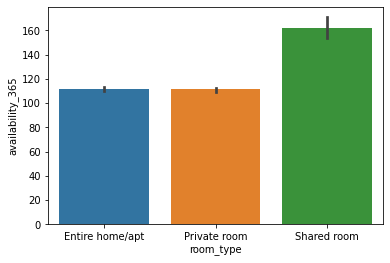

In [43]:
#room_type - availability_365
result = df.groupby(["room_type"])['availability_365'].aggregate(np.median).reset_index().sort_values('availability_365')
sns.barplot(x='room_type', y="availability_365", data=df, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

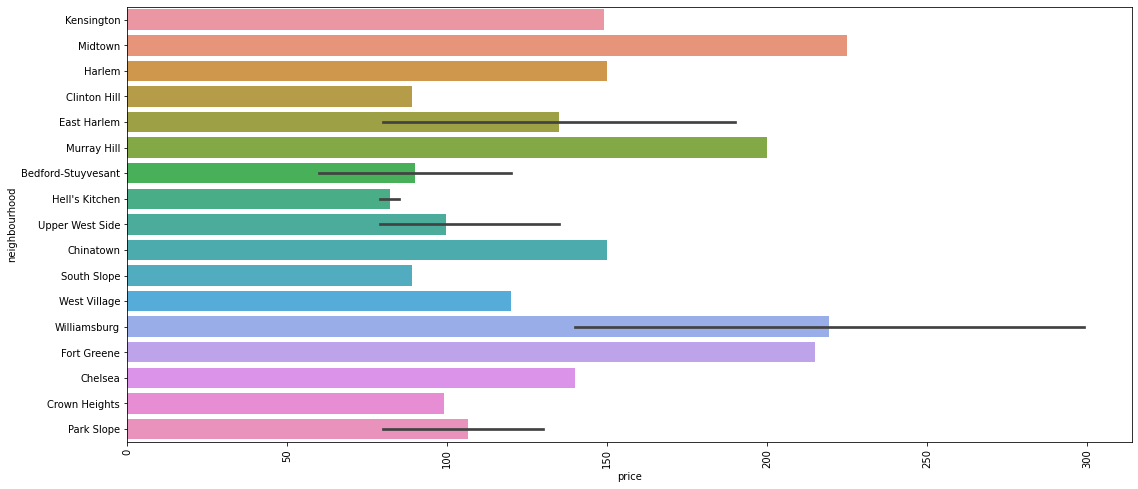

In [44]:
#neighbourhood - price
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x=df.price[:25], y=df.neighbourhood[:25]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

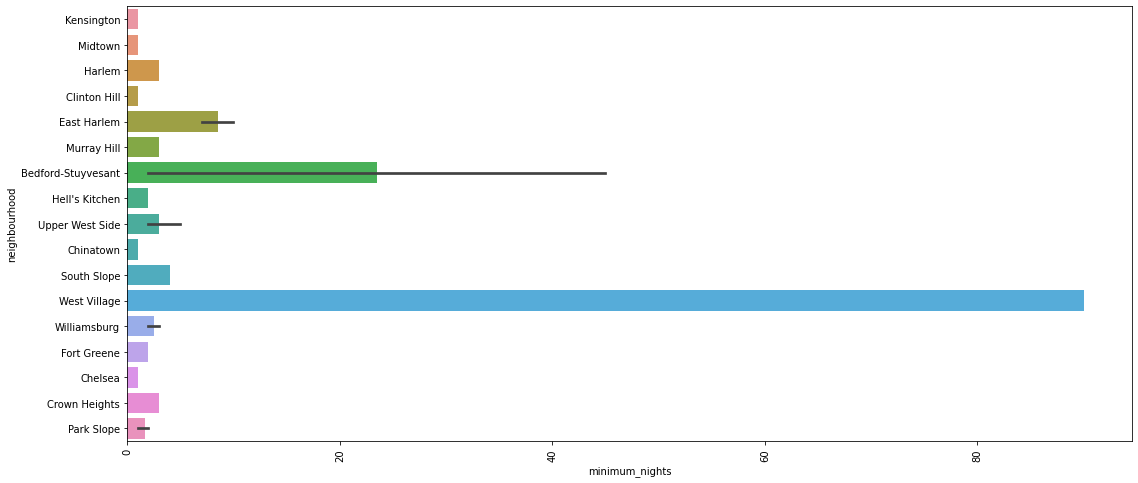

In [45]:
#neighbourhood - minimum_nights
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['minimum_nights'].aggregate(np.median).reset_index().sort_values('minimum_nights')
sns.barplot(x=df.minimum_nights[:25], y=df.neighbourhood[:25]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

In [46]:
#neighbourhood - number_of_reviews
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['number_of_reviews'].aggregate(np.median).reset_index().sort_values('number_of_reviews')
sns.barplot(x=df.number_of_reviews[:25], y=df.neighbourhood[:25]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

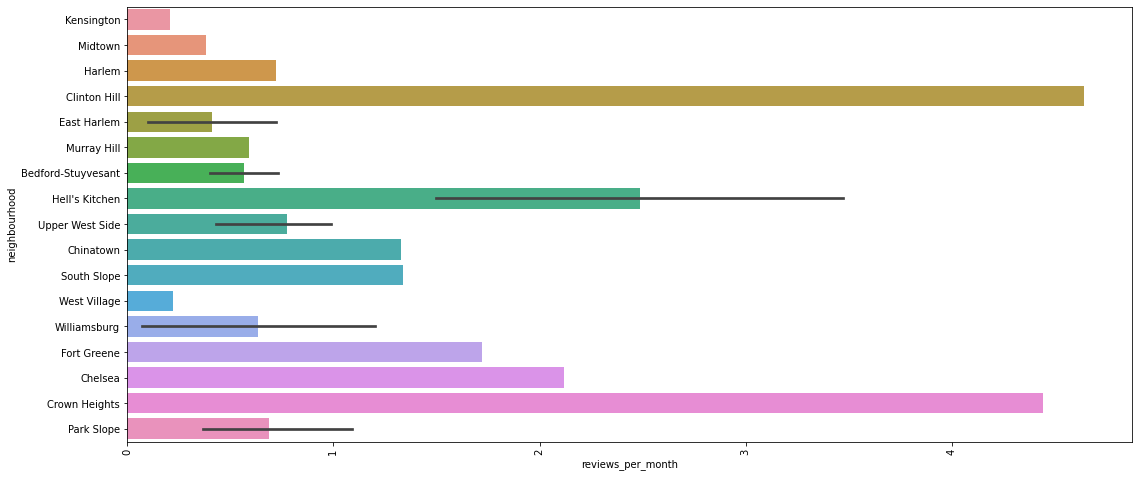

In [47]:
#neighbourhood - reviews_per_month
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x=df.reviews_per_month[:25], y=df.neighbourhood[:25]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

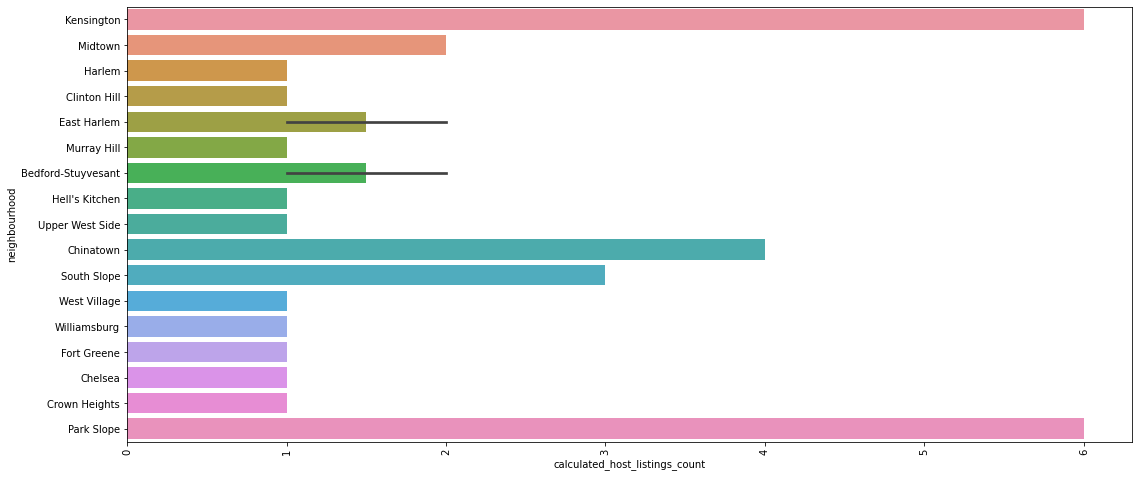

In [48]:
#neighbourhood - calculated_host_listings_count
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')
sns.barplot(x=df.calculated_host_listings_count[:25], y=df.neighbourhood[:25]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

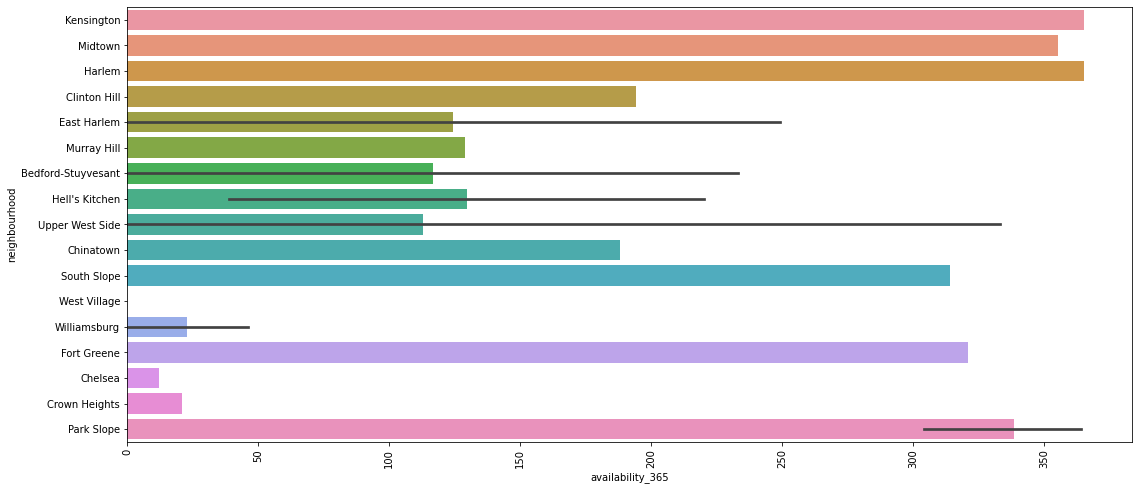

In [49]:
#neighbourhood - availability_365
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['availability_365'].aggregate(np.median).reset_index().sort_values('availability_365')
sns.barplot(x=df.availability_365[:25], y=df.neighbourhood[:25]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

In [50]:
df = df.sort_values(by=["price"], ascending=False)
df['rank']=tuple(zip(df.price))
df['rank']=df.groupby('price',sort=False)['rank'].apply(lambda x : pd.Series(pd.factorize(x)[0])).values
df.head()

name neighbourhood_group  \
9151                 Furnished room in Astoria apartment              Queens   
17692    Luxury 1 bedroom apt. -stunning Manhattan views            Brooklyn   
29238                                1-BR Lincoln Center           Manhattan   
40433  2br - The Heart of NYC: Manhattans Lower East ...           Manhattan   
12342                Quiet, Clean, Lit @ LES & Chinatown           Manhattan   

         neighbourhood  latitude  longitude        room_type  price  \
9151           Astoria  40.76810  -73.91651     Private room  10000   
17692       Greenpoint  40.73260  -73.95739  Entire home/apt  10000   
29238  Upper West Side  40.77213  -73.98665  Entire home/apt  10000   
40433  Lower East Side  40.71980  -73.98566  Entire home/apt   9999   
12342  Lower East Side  40.71355  -73.98507     Private room   9999   

       minimum_nights  number_of_reviews  reviews_per_month  \
9151              100                  2               0.04   
17692               5                  5               0.16   
29238              30                  0               0.72   
40433              30                  0               0.72   
12342              99                  6               0.14   

       calculated_host_listings_count  availability_365  rank  
9151                                1                 0     0  
17692                               1                 0     0  
29238                               1                83     0  
40433                               1               365     0  
12342                               1                83     0

In [51]:
df.reset_index(inplace=True,drop=True)
df.head(5)

name neighbourhood_group  \
0                Furnished room in Astoria apartment              Queens   
1    Luxury 1 bedroom apt. -stunning Manhattan views            Brooklyn   
2                                1-BR Lincoln Center           Manhattan   
3  2br - The Heart of NYC: Manhattans Lower East ...           Manhattan   
4                Quiet, Clean, Lit @ LES & Chinatown           Manhattan   

     neighbourhood  latitude  longitude        room_type  price  \
0          Astoria  40.76810  -73.91651     Private room  10000   
1       Greenpoint  40.73260  -73.95739  Entire home/apt  10000   
2  Upper West Side  40.77213  -73.98665  Entire home/apt  10000   
3  Lower East Side  40.71980  -73.98566  Entire home/apt   9999   
4  Lower East Side  40.71355  -73.98507     Private room   9999   

   minimum_nights  number_of_reviews  reviews_per_month  \
0             100                  2               0.04   
1               5                  5               0.16   
2              30                  0               0.72   
3              30                  0               0.72   
4              99                  6               0.14   

   calculated_host_listings_count  availability_365  rank  
0                               1                 0     0  
1                               1                 0     0  
2                               1                83     0  
3                               1               365     0  
4                               1                83     0

In [52]:
df_rich_hosts=pd.DataFrame(df.iloc[:,0:2])
df_rich_hosts['latitude']=df.iloc[:,3]
df_rich_hosts['longitude']=df.iloc[:,4]
df_rich_hosts['room_type']=df.iloc[:,5]
df_rich_hosts['price']=df.iloc[:,6]
df_rich_hosts.head()

name neighbourhood_group  \
0                Furnished room in Astoria apartment              Queens   
1    Luxury 1 bedroom apt. -stunning Manhattan views            Brooklyn   
2                                1-BR Lincoln Center           Manhattan   
3  2br - The Heart of NYC: Manhattans Lower East ...           Manhattan   
4                Quiet, Clean, Lit @ LES & Chinatown           Manhattan   

   latitude  longitude        room_type  price  
0  40.76810  -73.91651     Private room  10000  
1  40.73260  -73.95739  Entire home/apt  10000  
2  40.77213  -73.98665  Entire home/apt  10000  
3  40.71980  -73.98566  Entire home/apt   9999  
4  40.71355  -73.98507     Private room   9999

In [53]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [54]:
df[df.room_type=="Private room"].describe().T

count        mean         std       min  \
latitude                        22326.0   40.729208    0.058214  40.49979   
longitude                       22326.0  -73.942924    0.048025 -74.24285   
price                           22326.0   89.780973  160.205262   0.00000   
minimum_nights                  22326.0    5.377900   16.292091   1.00000   
number_of_reviews               22326.0   24.112962   47.286746   0.00000   
reviews_per_month               22326.0    1.293807    1.640274   0.01000   
calculated_host_listings_count  22326.0    3.227717   10.218641   1.00000   
availability_365                22326.0  111.203933  132.092065   0.00000   
rank                            22326.0    0.000000    0.000000   0.00000   

                                     25%        50%         75%          max  
latitude                        40.68927  40.717765   40.764657     40.91306  
longitude                      -73.96989 -73.948105  -73.925185    -73.71299  
price                           50.00000  70.000000   95.000000  10000.00000  
minimum_nights                   1.00000   2.000000    4.000000    999.00000  
number_of_reviews                1.00000   5.000000   25.000000    629.00000  
reviews_per_month                0.30000   0.720000    1.650000     58.50000  
calculated_host_listings_count   1.00000   1.000000    2.000000    327.00000  
availability_365                 0.00000  45.000000  214.000000    365.00000  
rank                             0.00000   0.000000    0.000000      0.00000

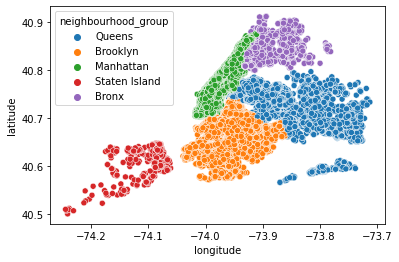

In [55]:
sns.scatterplot(df_rich_hosts.longitude,df_rich_hosts.latitude,hue=df_rich_hosts.neighbourhood_group)
plt.ioff()

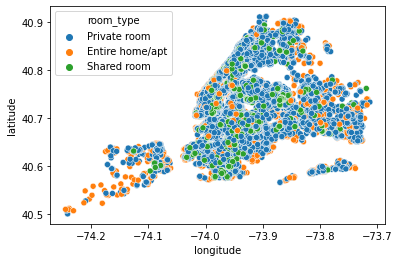

In [56]:
sns.scatterplot(df_rich_hosts.longitude,df_rich_hosts.latitude,hue=df_rich_hosts.room_type)
plt.ioff()

In [57]:
import folium
from folium.plugins import HeatMap
m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(df_rich_hosts[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

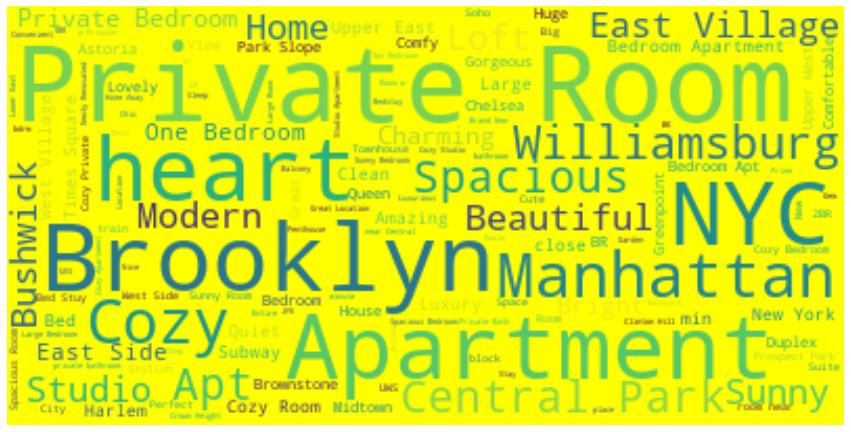

In [58]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df_rich_hosts.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="yellow").generate(text)
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()